 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical


Load Dataset

In [3]:
df = pd.read_csv("/content/twitter_training.csv")

In [4]:
df.columns = ["ID", "Category", "Sentiment", "Tweet"]

Select Features and Labels

In [5]:
X = df.iloc[:, 3].astype(str).values
y = df.iloc[:, 2].values

Encode labels

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Tokenization and Padding

In [8]:
max_words = 10000     # Vocabulary size
max_len = 100         # Max length of tweet (truncate/pad)

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")


Build CNN Model

In [9]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation="tanh"),
    GlobalMaxPooling1D(),
    Dense(64, activation="tanh"),
    Dropout(0.5),
    Dense(y.shape[1], activation="softmax")  # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Train Model

In [19]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=13,
    batch_size=128,
    verbose=1
)

Epoch 1/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9693 - loss: 0.0701 - val_accuracy: 0.8919 - val_loss: 0.3556
Epoch 2/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9697 - loss: 0.0670 - val_accuracy: 0.8925 - val_loss: 0.3511
Epoch 3/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9706 - loss: 0.0694 - val_accuracy: 0.8915 - val_loss: 0.3465
Epoch 4/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9714 - loss: 0.0646 - val_accuracy: 0.8942 - val_loss: 0.3500
Epoch 5/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9705 - loss: 0.0676 - val_accuracy: 0.8863 - val_loss: 0.3727
Epoch 6/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9685 - loss: 0.0694 - val_accuracy: 0.8944 - val_loss: 0.3544
Epoch 7/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9704 - loss: 0.0663 - val_accuracy: 0.8953 - val_loss: 0.3453
Epoch 8/13
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9690 - loss: 0.0678 - val_accuracy: 0.

 Evaluate Model

In [20]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\n✅ CNN Test Accuracy: {accuracy * 100:.2f}%")



✅ CNN Test Accuracy: 89.17%


In [21]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Accuracy Plot

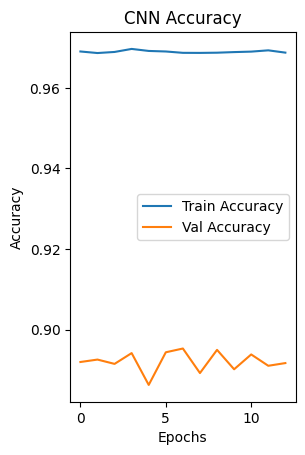

In [22]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Loss Plot

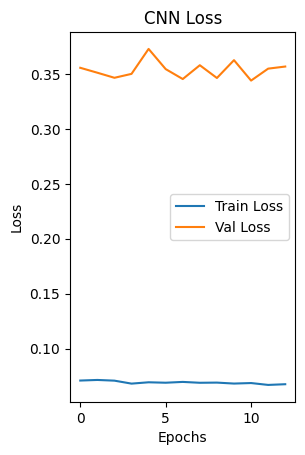

In [23]:
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()